In [36]:
import time
import boto3
from sagemaker.session import Session
import sys
company_email = 'mathias.andler@ny.frb.org'

In [2]:
from ExtractBrokerDealers import dealerData

In [22]:
cik2brokers = {'years-covered': [], 'broker-dealers': {}}

In [ ]:
years = [2019]
company_email
quarters = ['QTR1', 'QTR2', 'QTR3', 'QTR4']
cik2brokers = {'years-covered': [], 'broker-dealers': {}}
    
dealerData(years,company_email,quarters,cik2brokers)

EXTRACTING BROKER-DEALER INFORMATION

Searching for broker dealers at https://www.sec.gov/Archives/edgar/full-index/2019/QTR1/form.idx
  Adding coverage for 2019/QTR1
	Found 2959 X-17A-5 filings in 2019/QTR1
		Found CIK 1647385, company-name 16 POINTS LLC 
		Found CIK 1721381, company-name 180 DEGREE CAPITAL BD, LLC 
		Found CIK 1482939, company-name 1851 SECURITIES, INC 
		Found CIK 949918, company-name 1ST DISCOUNT BROKERAGE, INC. 
		Found CIK 1681734, company-name 280 SECURITIES LLC 
		Found CIK 1567191, company-name 303 ALTERNATIVES, LLC 
		Found CIK 1705704, company-name 303 SECURITIES, LP 
		Found CIK 1697088, company-name SECURE CAPITAL RESEARCH, LLC 
		Found CIK 1491529, company-name 7M SECURITIES, LLC 
		Found CIK 1693773, company-name 8 RIVERS ADVISORS, LLC 
		Found CIK 1001379, company-name A & M SECURITIES, LLC 
		Found CIK 865594, company-name A. P. SECURITIES, INC. 
		Found CIK 1005399, company-name A.BRIDGE REALVEST SECURITIES CORPORATION 
		Found CIK 1043258, company-na

## Making sure I can link notebook to my S3 bucket

In [39]:
s3_pointer = boto3.client('s3')
s3_session = Session()

s3_bucket = "x17a-mathias-test"
temp_folder ='Temp/'

#s3_session.list_s3_files(s3_bucket, temp_folder)


[]

## Debugging SEC parsing error

Wikipedia is useful to test URL parsing as it doesnt have proxy/ special credentials

In [26]:
import os
os.environ['http_proxy'] = "http://p1proxy.frb.org:8080" 
os.environ['https_proxy'] = "http://p1proxy.frb.org:8080" 

In [27]:
# parsing SEC website for data  
import requests 
from bs4 import BeautifulSoup

In [28]:
url = 'https://en.wikipedia.org/wiki/Riemann_hypothesis'
sec_url = 'https://www.sec.gov/Archives/edgar/full-index/2021/QTR1/form.idx'
company_email = 'mathias.andler@ny.frb.org'

for i in range(5):
    print(requests.get(sec_url, headers={'User-Agent': 'Company Name ' + company_email},
                       stream=True, allow_redirects=True))
    time.sleep(1)

<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>
<Response [200]>


In [7]:
# without additional credentials 
for i in range(5):
    print(requests.get(sec_url, stream=True, allow_redirects=True))

<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>
<Response [403]>


In [5]:
import pandas as pd

In [6]:
table_url = 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=42352&type=X-17A-5&dateb=20211'

r = requests.get(table_url, headers={'User-Agent': 'Company Name ' + company_email})
pd.read_html(r.text)


KeyboardInterrupt: 

## Debugging PDF Read error
We get error code "PdfReadWarning: Invalid stream (index 2) within object 159 0: Stream has ended unexpectedly [pdf.py:1573]" when running

In [10]:
#!/usr/bin/env python
# coding: utf-8


In [4]:
from run_file_extraction import main_p1

In [5]:
import pdf2image

In [2]:
import sys
print(sys.version)

3.7.12 | packaged by conda-forge | (default, Oct 26 2021, 06:08:53) 
[GCC 9.4.0]


## Debugging 'MemoryError'
We get error 'Memoryerror' coming from pdf2image module (in main_1 step 3).
The problem comes from the convert_from_path function when it has to work with a pdf that is too large.


This problem is fixed.

In [5]:
from pdf2image import convert_from_path, pdfinfo_from_path

In [6]:
%load_ext memory_profiler


In [6]:
import numpy as np

In [8]:
a = np.zeros((4,4))

In [12]:
%memit info = pdfinfo_from_path('temp.pdf', userpw=None, poppler_path=None)
maxPages = info["Pages"]


peak memory: 2330.99 MiB, increment: 0.01 MiB


In [17]:
maxPages = pdfinfo_from_path('temp.pdf', userpw=None, poppler_path=None)["Pages"]

In [19]:
U = convert_from_path('temp.pdf', first_page=0, last_page = 10)

In [15]:
for page in range(1, maxPages+1, 10) : 
    %memit convert_from_path('temp.pdf', dpi=500, first_page=page, last_page = min(page+10-1,maxPages))

peak memory: 3612.12 MiB, increment: 1281.10 MiB
peak memory: 3583.73 MiB, increment: 1252.70 MiB
peak memory: 3622.16 MiB, increment: 1291.14 MiB
peak memory: 3560.31 MiB, increment: 1229.29 MiB
peak memory: 3624.18 MiB, increment: 1293.16 MiB
peak memory: 3653.61 MiB, increment: 1322.58 MiB
peak memory: 3197.87 MiB, increment: 866.84 MiB


In [6]:
%memit l = convert_from_path('temp.pdf', 500)

peak memory: 13761.93 MiB, increment: 13616.12 MiB


In [8]:
%memit l = convert_from_path('temp.pdf',dpi=200)

peak memory: 3007.93 MiB, increment: 1701.85 MiB


In [9]:
%memit lili = convert_from_path('temp.pdf',dpi=200)

peak memory: 3036.57 MiB, increment: 1730.47 MiB


In [ ]:
for i in range()

In [21]:
try:
    #pages = convert_from_path('temp.pdf', 100)
    maxPages = pdfinfo_from_path('temp.pdf', userpw=None, poppler_path=None)["Pages"]
    
    # determine the iterable size (number of page in document)
    if maxPages > 20:
        size = 20
    else: size = maxPages
        
    for i in range(1, maxPages+1, 10):

        pages = convert_from_path('temp.pdf', dpi=500, first_page=i, last_page = min(i+10-1,maxPages))

        if i == 1:
            max_page = min(11,size)
        else:
            max_page = size

        for idx in range(i,max_page):
            # write the png name for exportation
            export_file_name = "{}-p{}.png".format(base_file, idx)

            # storing PDF page as a PNG file locally (using pdf2image)
            pages[idx].save(export_file_name, 'PNG')

            # save contents to AWS S3 bucket as specified
            with open(export_file_name, 'rb') as data:
                s3_pointer.upload_fileobj(data, s3_bucket, export_png + base_file + '/' + export_file_name)

            os.remove(export_file_name)

    print('\tSaved png files for -> %s' % base_file)

except PDFPageCountError:
    print('\tEncountered PDFPageCounterError when trying to convert to PNG for -> %s' % base_file)

except PDFInfoNotInstalledError:
    print('\tUnable to get page count, may be a bug in the libpoppler library for PNG.')

1


NameError: name 'PDFPageCountError' is not defined

In [15]:
sys.getsizeof(l[0])

64

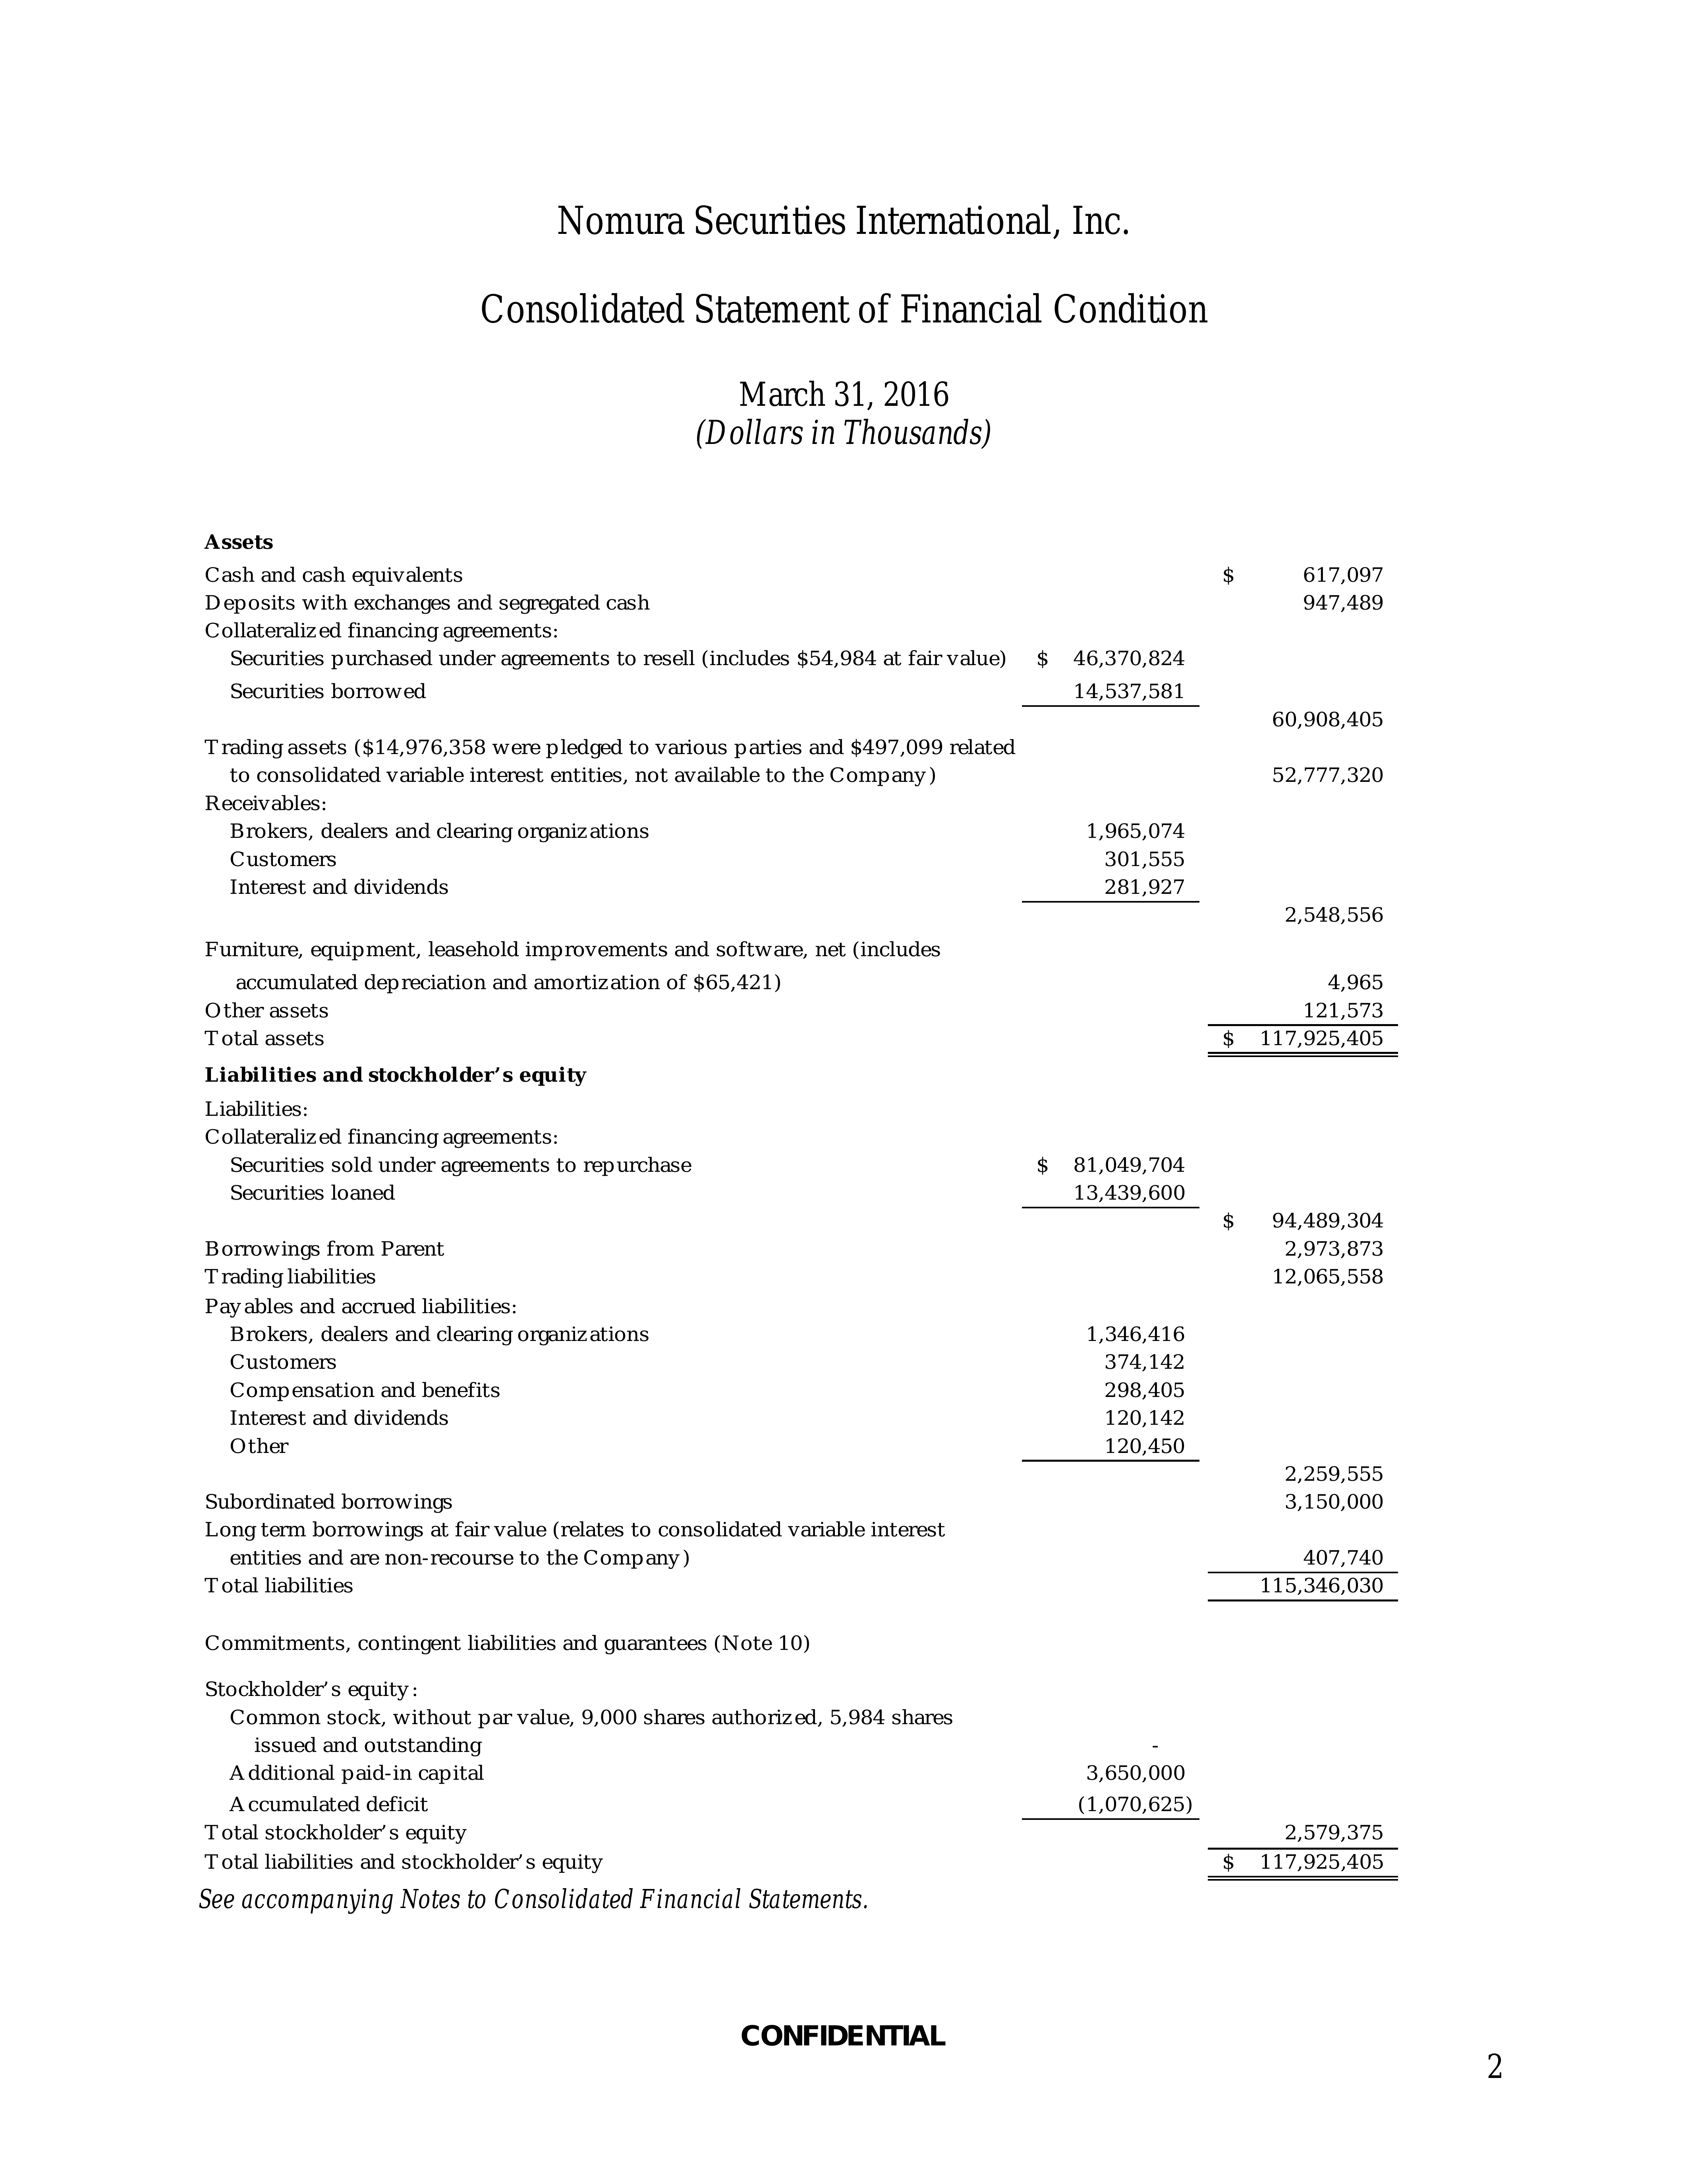

In [14]:
l[0]

## Why aren't PNGs caught if they already exist?
Problem fixed

In [7]:
from GLOBAL import GlobVars

In [8]:
(GlobVars.s3_pointer, GlobVars.s3_session, 
        GlobVars.temp_folder, GlobVars.input_folder_raw, GlobVars.temp_folder_pdf_slice, 
        GlobVars.temp_folder_png_slice
           )

(<botocore.client.S3 at 0x7f251a5454d0>,
 'Temp/',
 'Input/X-17A-5/',
 'Temp/X-17A-5-PDF-SUBSETS/',
 'Temp/X-17A-5-PNG-SUBSETS/')

In [9]:
export_pdf = GlobVars.temp_folder_pdf_slice
export_png = GlobVars.temp_folder_png_slice
input_raw = GlobVars.input_folder_raw

In [10]:
pdf_paths = s3_session.list_s3_files(s3_bucket, export_pdf)
png_paths = s3_session.list_s3_files(s3_bucket, export_png)

In [11]:
export_pdf

'Temp/X-17A-5-PDF-SUBSETS/'

In [12]:
export_png

'Temp/X-17A-5-PNG-SUBSETS/'

In [13]:
input_paths = s3_session.list_s3_files(s3_bucket, input_raw)

In [14]:
from FocusReportSlicing import selectPages, extractSubset, brokerFilter

In [15]:
broker_dealers_list = ['782124', '42352', '68136', '91154', '72267']

In [17]:
print(list(raw_broker_dealer_pdfs))
for path_name in raw_broker_dealer_pdfs:
    print('Slicing FOCUS report filing for %s' % path_name)
    # check to see if values are downloaded to s3 sub-bin
    base_file = path_name.split('/')[-1].split('.')[0]
    pdf_look_up = export_pdf + base_file + '-subset.pdf'
    png_look_up = export_png + base_file + '/' + base_file + '-p0.png'
    
    #print(pdf_look_up in pdf_paths)
    #print((png_look_up in png_paths))
    #print()
print(list(raw_broker_dealer_pdfs))

[]
[]


In [47]:
png_look_up

'Temp/X-17A-5-PNG-SUBSETS/91154-2021-03-01/91154-2021-03-01-p0.png'

In [48]:
pdf_look_up

'Temp/X-17A-5-PDF-SUBSETS/91154-2021-03-01-subset.pdf'

## Debugging early step 8 fail with missing manual classification

In [33]:
s3_session.list_s3_files(s3_bucket, "ff")

[]

In [34]:
s3_pointer.download_file(s3_bucket, asset_ttset, 'tem.csv')

NameError: name 'asset_ttset' is not defined

In [36]:
input_folder = 'Input/'
asset_ml_model = input_folder + 'asset_log_reg_mdl_v2.joblib'
liable_ml_model = input_folder + 'liability_log_reg_mdl_v2.joblib'


In [37]:
liable_ml_model

'Input/liability_log_reg_mdl_v2.joblib'

In [38]:
s3_session.list_s3_files(s3_bucket, "Input/")

['Input/',
 'Input/X-17A-5/1001383-2005-03-01.pdf',
 'Input/X-17A-5/1001383-2006-03-01.pdf',
 'Input/X-17A-5/1001383-2007-03-01.pdf',
 'Input/X-17A-5/1001383-2008-02-29.pdf',
 'Input/X-17A-5/1001383-2009-03-02.pdf',
 'Input/X-17A-5/1001383-2010-03-01.pdf',
 'Input/X-17A-5/1001383-2011-03-01.pdf',
 'Input/X-17A-5/1001383-2012-02-29.pdf',
 'Input/X-17A-5/1001383-2013-03-01.pdf',
 'Input/X-17A-5/1001383-2014-02-27.pdf',
 'Input/X-17A-5/1001383-2015-02-27.pdf',
 'Input/X-17A-5/1001383-2016-02-26.pdf',
 'Input/X-17A-5/1001383-2017-03-01.pdf',
 'Input/X-17A-5/1001383-2018-05-23.pdf',
 'Input/X-17A-5/1001383-2019-03-01.pdf',
 'Input/X-17A-5/1001383-2020-02-28.pdf',
 'Input/X-17A-5/1001383-2021-03-01.pdf',
 'Input/X-17A-5/1003108-2002-02-27.pdf',
 'Input/X-17A-5/1003108-2003-03-03.pdf',
 'Input/X-17A-5/1003108-2004-03-04.pdf',
 'Input/X-17A-5/1003108-2005-03-02.pdf',
 'Input/X-17A-5/1003108-2006-02-28.pdf',
 'Input/X-17A-5/1003108-2007-02-21.pdf',
 'Input/X-17A-5/1003108-2008-02-13.pdf',
 'Inp

In [43]:
asset_ttset = GlobVars.asset_ml_ttset
asset_ttset

'Input/asset_lineitem_training_testing.csv'

In [44]:
s3_pointer.download_file(s3_bucket, asset_ttset, 'temp.csv')


## Debugging PDF Reading error
PyPDF2.utils.PdfReadError: File has not been decrypted



In [12]:
from FocusReportExtract import searchURL, edgarParse, fileExtract, mergePdfs

In [4]:
url = 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1068940&type=X-17A-5&dateb=20211231'

In [5]:
response = edgarParse(url,'mathias.andler@ny.frb.org')


In [6]:
filing_dates, archives = response

# logging info for when files are being downloaded
print('Downloading X-17A-5 files for %s - CIK (%s)')
print('\t%s' % url)

# iterate through each of the pdf URLs corresponding to archived contents
for i, pdf_url in enumerate(archives):
    print(i)
    # filing date in full yyyy-MM-dd format
    date = filing_dates[i]      

    # Construct filename & pdf file naming convention (e.g. filename = 1904-2020-02-26.pdf)   
    file_name = '-' + date + '.pdf'        

    
        # extract all acompanying pdf files, merging all to one large pdf
    pdf_files = fileExtract(pdf_url,'mathias.andler@ny.frb.org')

    # make sure we don't return empty lists
    if len(pdf_files) > 0:
        print('\tExtracting FOCUS filing for %s' % date)
        concatPdf = mergePdfs(pdf_files,'mathias.andler@ny.frb.org')

        # open file and save to local instance
        with open(file_name, 'wb') as f:
            concatPdf.write(f)
            f.close()

        # save contents to AWS S3 bucket
        with open(file_name, 'rb') as data:
            s3_pointer.upload_fileobj(data, s3_bucket, pdf_name)
        os.remove(file_name)

    else: print('\tNo files found for %s on %s' % (companyName, date))

# identify error in the event edgar parse (web-scrapping returns None)
else: print('WEB-SCRAPPING ERROR: Unable to download %s - CIK (%s), no filing' % (companyName, cik_id))

	https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1068940&type=X-17A-5&dateb=20211231
0
	Extracting FOCUS filing for 2021-03-01


NameError: name 'pdf_name' is not defined

In [99]:
from PyPDF2 import PdfFileReader, PdfFileWriter, utils

In [68]:
pdf = PdfFileReader('temp.pdf', strict=False) 
nPages = pdf.getNumPages()

In [79]:
from pikepdf import Pdf
with Pdf.open('temp.pdf') as pdf:
    pdf.save('test_decrypt.pdf')

In [80]:
pdf_decrypt = PdfFileReader('test_decrypt.pdf', strict=False) 
nPages = pdf_decrypt.getNumPages()

In [92]:
# read pdf file as PyPDF2 object
pdf = PdfFileReader('temp-1.pdf', strict=False) 


try:
    nPages = pdf.getNumPages()
except:
    with Pdf.open('temp-1.pdf') as pdf:
        pdf.save('test_decrypt.pdf')
    
    pdf_bis = PdfFileReader('test_decrypt.pdf', strict=False) 
    nPages = pdf_bis.getNumPages()

In [93]:
nPages

15

## Debugging PyPDF@.utils unable to find endstream market after stream at byte

In [3]:
from FocusReportExtract import searchURL, edgarParse, fileExtract, mergePdfs

In [4]:
url = 'https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1130412&type=X-17A-5&dateb=20211231'

In [5]:
response = edgarParse(url,'mathias.andler@ny.frb.org')


In [109]:
concatPdf

In [9]:
filing_dates, archives = response
# logging info for when files are being downloaded
print('Downloading X-17A-5 files for %s - CIK (%s)')
print('\t%s' % url)

# iterate through each of the pdf URLs corresponding to archived contents
for i, pdf_url in enumerate(archives):
    print(i)
    # filing date in full yyyy-MM-dd format
    date = filing_dates[i]      

    # Construct filename & pdf file naming convention (e.g. filename = 1904-2020-02-26.pdf)   
    file_name = '-' + date + '.pdf'        

    
        # extract all acompanying pdf files, merging all to one large pdf
    pdf_files = fileExtract(pdf_url,'mathias.andler@ny.frb.org')

    # make sure we don't return empty lists
    if len(pdf_files) > 0:
        print('\tExtracting FOCUS filing for %s' % date)
        concatPdf = mergePdfs(pdf_files,'mathias.andler@ny.frb.org')
        
          # open file and save to local instance
        with open(file_name, 'wb') as f:
            try:
                print('NO erroorr')
                concatPdf.write(f)
            except:
                print('Errrrror')
                concatPdf = mergePdfs(pdf_files,'mathias.andler@ny.frb.org', second_path=True)
                concatPdf.write(f)
            f.close()

	https://www.sec.gov/cgi-bin/browse-edgar?action=getcompany&CIK=1130412&type=X-17A-5&dateb=20211231
0
	Extracting FOCUS filing for 2020-11-25
NO erroorr
1
	Extracting FOCUS filing for 2019-11-27
NO erroorr
2
	Extracting FOCUS filing for 2019-03-13
NO erroorr
3
	Extracting FOCUS filing for 2017-11-29
NO erroorr
4
	Extracting FOCUS filing for 2016-11-22
NO erroorr
5
	Extracting FOCUS filing for 2015-11-27
NO erroorr
6
	Extracting FOCUS filing for 2014-11-28
NO erroorr
7
	Extracting FOCUS filing for 2013-11-27
NO erroorr
8
	Extracting FOCUS filing for 2013-03-18
NO erroorr
9
	Extracting FOCUS filing for 2012-03-01
NO erroorr
10
	Extracting FOCUS filing for 2011-02-25
NO erroorr
11
	Extracting FOCUS filing for 2010-03-01
NO erroorr
12
	Extracting FOCUS filing for 2009-02-25
NO erroorr
13
	Extracting FOCUS filing for 2007-03-01
NO erroorr
14
	Extracting FOCUS filing for 2006-03-01
NO erroorr
15
	Extracting FOCUS filing for 2004-03-01
NO erroorr
16
	Extracting FOCUS filing for 2003-02-27
NO 

In [49]:
files = pdf_files
from PyPDF2 import PdfFileReader, PdfFileWriter, utils
import requests
from bs4 import BeautifulSoup
import numpy as np
import os

### mergePdfs function

In [74]:
# initialize a pdf object to be store pdf pages


import time
start = time.time()


pdfWriter = PdfFileWriter()

for pdf in files:
    pdf_file = 'https://www.sec.gov' + pdf 

    # we try requesting the URL and break only if response object returns status of 200
    for _ in range(20):
        pdf_storage = requests.get(pdf_file, headers={'User-Agent': 'Company Name ' + company_email},
                       stream=True, allow_redirects=True)
        time.sleep(1)
        if pdf_storage.status_code == 200: break

    # last check to see if response object is "problematic" e.g. 403
    if pdf_storage.status_code != 200: 
        continue

    # save PDF contents to local file location 
    open('temp.pdf', 'wb').write(pdf_storage.content)
    # read pdf file as PyPDF2 object
    pdf = PdfFileReader('temp.pdf', strict=False) 
    try:
        nPages = pdf.getNumPages()
    except: #some encryption 
        with Pdf.open('temp.pdf', allow_overwriting_input=True) as pdf:
            pdf.save('temp.pdf')

        pdf = PdfFileReader('temp.pdf', strict=False) 
        nPages = pdf.getNumPages()

    # add the pages from the document as specified 
    for page_num in np.arange(nPages):
        pdfWriter.addPage(pdf.getPage(page_num))

#if os.path.isfile('./temp.pdf'): os.remove('temp.pdf')

concatPdf = pdfWriter

    
print(time.time() - start)

1.4913148880004883


In [44]:
class Param:
    mama = False
    
Param.mama

False

In [42]:
def fifi(mams):
    print(mams)
    mams = True
    print(mams)
    print(Param.mama)
    
def fofo(mams):
    print(mams)
    Param.mama = True
    print(mams)
    print(Param.mama)

      

In [43]:
fifi(Param.mama)
Param.mama

False
True
False


False

In [45]:
fofo(Param.mama)
Param.mama

False
False
True


True

## Debugging zlib.error: Error -5 while decompressing data: incomplete or truncated stream

In [50]:
from PyPDF2 import PdfFileReader, PdfFileWriter, utils

In [51]:
pdf = PdfFileReader('temp.pdf', strict=False) 


error: Error -5 while decompressing data: incomplete or truncated stream

## Returned object for edgar parse is None

In [65]:
from FocusReportExtract import searchURL, edgarParse, fileExtract, mergePdfs

In [66]:
s3_pointer = boto3.client('s3')
s3_session = Session()

# Amazon Textract client
textract = boto3.client('textract')

# folder & directory information
temp_folder ='Temp/'
input_folder = 'Input/'
output_folder = 'Output/'                

input_folder_raw = input_folder + 'X-17A-5/'

input_raw = input_folder_raw
input_paths = s3_session.list_s3_files(s3_bucket, input_raw)


In [67]:
len(input_paths)

77110

In [73]:
cik_id =  '1315971'
url = searchURL(cik_id)
response = edgarParse(url,company_email)


In [108]:
for i in range(11):
    print(10-i)
    time.sleep(1)
print('Happy New Year')

10
9
8
7
6
5
4
3
2
1
0
Happy New Year


In [112]:
s = 1

In [105]:
response = edgarParse(url,'mathias.andler@ny.frb.org')

In [103]:
response

(array(['2012-02-29', '2011-03-01', '2010-03-01', '2009-03-02',
        '2008-02-28', '2007-03-01', '2006-02-28'], dtype=object),
 ['https://www.sec.gov/Archives/edgar/data/1315971/999999999712004938/9999999997-12-004938-index.htm',
  'https://www.sec.gov/Archives/edgar/data/1315971/999999999711006655/9999999997-11-006655-index.htm',
  'https://www.sec.gov/Archives/edgar/data/1315971/999999999710003879/9999999997-10-003879-index.htm',
  'https://www.sec.gov/Archives/edgar/data/1315971/999999999709009036/9999999997-09-009036-index.htm',
  'https://www.sec.gov/Archives/edgar/data/1315971/999999999708011461/9999999997-08-011461-index.htm',
  'https://www.sec.gov/Archives/edgar/data/1315971/999999999707012612/9999999997-07-012612-index.htm',
  'https://www.sec.gov/Archives/edgar/data/1315971/999999999706015694/9999999997-06-015694-index.htm'])

In [104]:
type(response)

tuple

In [77]:
filing_dates, archives = response

TypeError: cannot unpack non-iterable NoneType object

In [94]:
if type(response) is not type(None):
    print('wtf')
else:
    print('exception raised')

wtf


In [97]:
if type(response) is not type(None):
    print('wtf')
else:
    print('exception raised')

exception raised


In [81]:
response

In [85]:
def flex(x):
    if x > 0:
        return x
    else:
        return None
    
def flexi(x):
    if x > 0:
        return x

In [87]:
a = flex(-4)

In [91]:
type(flexi(-4))

NoneType

In [89]:
type(a)

NoneType

In [133]:
response = edgarParse(url,'44')

if type(response) is type(None):
    print('went in if loop')
    for tries in range(2):
        print('went in for loop')
        time.sleep(10)
        response = edgarParse(url,'44')
        if type(response) is not type(None):
            print('issue solved')
            break
            
print('We tried %s times' %(tries+2))


went in if loop
went in for loop
went in for loop
We tried 3 times


In [130]:
print('We tried %s times' %tries)


We tried 0 times


In [123]:
tries

0

In [124]:
response

(array(['2012-02-29', '2011-03-01', '2010-03-01', '2009-03-02',
        '2008-02-28', '2007-03-01', '2006-02-28'], dtype=object),
 ['https://www.sec.gov/Archives/edgar/data/1315971/999999999712004938/9999999997-12-004938-index.htm',
  'https://www.sec.gov/Archives/edgar/data/1315971/999999999711006655/9999999997-11-006655-index.htm',
  'https://www.sec.gov/Archives/edgar/data/1315971/999999999710003879/9999999997-10-003879-index.htm',
  'https://www.sec.gov/Archives/edgar/data/1315971/999999999709009036/9999999997-09-009036-index.htm',
  'https://www.sec.gov/Archives/edgar/data/1315971/999999999708011461/9999999997-08-011461-index.htm',
  'https://www.sec.gov/Archives/edgar/data/1315971/999999999707012612/9999999997-07-012612-index.htm',
  'https://www.sec.gov/Archives/edgar/data/1315971/999999999706015694/9999999997-06-015694-index.htm'])

## Adding progression bar

In [11]:
temp_folder ='Temp/'
input_folder = 'Input/'
output_folder = 'Output/'                

input_folder_raw = input_folder + 'X-17A-5/'
out_folder_raw_pdf = input_folder_raw

In [12]:

# csv directory where we store balance sheet information 
output_pdf_csvs = s3_session.list_s3_files(s3_bucket, out_folder_raw_pdf)

# temp directory where JSON files is stored
temp = s3_session.list_s3_files(s3_bucket, temp_folder)

input_pdf = temp_folder + 'X-17A-5-PDF-SUBSETS/'


# s3 directory where we store the broker-dealer sliced filings 
raw_pdf_files = s3_session.list_s3_files(s3_bucket, input_pdf)


In [13]:
rerun_job = 5
import os
import json

In [14]:
if (temp_folder + 'X17A5-FORMS.json' in temp) and (rerun_job > 4):
        # retrieving downloaded files from s3 bucket
        s3_pointer.download_file(s3_bucket, 'Temp/X17A5-FORMS.json', 'temp.json')
        
        # read data on KEY-VALUE dictionary (i.e Textract FORMS) 
        with open('temp.json', 'r') as f: forms_dictionary = json.loads(f.read())
        
        # remove local files for JSON
        os.remove('temp.json')
else:
    forms_dictionary = {}

if (temp_folder + 'X17A5-TEXT.json' in temp) and (rerun_job > 4):
    # retrieving downloaded files from s3 bucket
    s3_pointer.download_file(s3_bucket, 'Temp/X17A5-TEXT.json', 'temp.json')

    # read data on TEXT-Confidence dictionary
    with open('temp.json', 'r') as f: text_dictionary = json.loads(f.read())  

    # remove local files for JSON
    os.remove('temp.json')
else:
    text_dictionary = {}

if (temp_folder + 'ERROR-TEXTRACT.json' in temp) and (rerun_job > 4):
    # retrieving downloaded files from s3 bucket
    s3_pointer.download_file(s3_bucket, 'Temp/ERROR-TEXTRACT.json', 'temp.json')

    # read data on errors derived from Textract
    with open('temp.json', 'r') as f: error_dictionary = json.loads(f.read()) 

    # remove local files for JSON
    os.remove('temp.json')
else:
    error_dictionary = {}


In [17]:
import numpy as np

In [18]:
# retrieve old information from CIK and Dealers JSON file
s3_pointer.download_file(s3_bucket, temp_folder + 'CIKandDealers.json', 'temp.json')
with open('temp.json', 'r') as f: old_cik2brokers = json.loads(f.read())

# re-assign contents with new additional information 
parse_years = np.arange(1993,2022)
cik2brokers = dealerData(years=parse_years,company_email=company_email, cik2brokers=old_cik2brokers)   
os.remove('temp.json')

EXTRACTING BROKER-DEALER INFORMATION
We have covered 1993/QTR1
We have covered 1993/QTR2
We have covered 1993/QTR3
We have covered 1993/QTR4
We have covered 1994/QTR1
We have covered 1994/QTR2
We have covered 1994/QTR3
We have covered 1994/QTR4
We have covered 1995/QTR1
We have covered 1995/QTR2
We have covered 1995/QTR3
We have covered 1995/QTR4
We have covered 1996/QTR1
We have covered 1996/QTR2
We have covered 1996/QTR3
We have covered 1996/QTR4
We have covered 1997/QTR1
We have covered 1997/QTR2
We have covered 1997/QTR3
We have covered 1997/QTR4
We have covered 1998/QTR1
We have covered 1998/QTR2
We have covered 1998/QTR3
We have covered 1998/QTR4
We have covered 1999/QTR1
We have covered 1999/QTR2
We have covered 1999/QTR3
We have covered 1999/QTR4
We have covered 2000/QTR1
We have covered 2000/QTR2
We have covered 2000/QTR3
We have covered 2000/QTR4
We have covered 2001/QTR1
We have covered 2001/QTR2
We have covered 2001/QTR3
We have covered 2001/QTR4
We have covered 2002/QTR1
W

In [19]:
from run_file_extraction import brokerFilter
broker_dealers = cik2brokers['broker-dealers'].keys()
textract_files = filter(lambda x: brokerFilter(broker_dealers, x), raw_pdf_files) 

In [20]:
n = len(list(filter(lambda x: brokerFilter(broker_dealers, x), raw_pdf_files)))

In [21]:
with open('temp.json', 'r') as f: error_dictionary = json.loads(f.read()) 


FileNotFoundError: [Errno 2] No such file or directory: 'temp.json'

In [51]:
try:
    a = 1/0
except Exception as e:
    a = e
    print(str(e))

division by zero


In [50]:
str(a)

'division by zero'

In [285]:
error_dictionary

{'1068940-2010-03-01': 'No Balance Sheet found, or parsing error'}

In [250]:
fileName = '1139137-2006-02-28.csv'
from OCRTextract import textractParse  
input_png = temp_folder + 'X-17A-5-PNG-RAW/'
png_paths = input_png + basefile + '/'
pdf_df, png_df, forms_data, text_data, error = textractParse(pdf_paths, png_paths, s3_bucket)


Started job with id: 60dc06ba6719a149d484bc8afbb457cc020bf1ce9e00ce6bdf910a8175f4ae2a
Job status: IN_PROGRESS
Job status: IN_PROGRESS
Job status: SUCCEEDED
Resultset page received: 1
Resultset page received: 2
Resultset page received: 3
Resultset page received: 4
Balance sheet line items have been split across table


Page number(s) for extraction in PNG are [3]


Textract-PDF dataframe
                        0                                                  1  \
0                Cash and                                   cash equivalents   
1            Intercompany                              income tax receivable   
2            Other assets                                                      
3                                                               Total assets   
4                                                                              
5                                                                              
6                                                 

In [256]:
from OCRClean import *

In [261]:
s3_pointer.download_file(s3_bucket, 'Temp/X17A5-TEXT.json', 'temp.json')

# read data on TEXT-Confidence dictionary
with open('temp.json', 'r') as f: text_dictionary = json.loads(f.read())  

# remove local files for JSON
os.remove('temp.json')

In [269]:
pdf_df

,0,1,2
0,Cash and,cash equivalents,"$ 487,709"
1,Intercompany,income tax receivable,"169,395"
2,Other assets,,"198,903"
3,,Total assets,"$ 856,007"
4,,,
5,,,
6,,,"229,936"
7,,Total liabilities,"229,936"
8,Stockholder's,equity:,
9,,,30


In [277]:
from OCRClean import clean_wrapper
prior_pdf_scaler = 1.0
prior_png_scaler = 1.0
prior_pdf_cik = np.nan
prior_png_cik = np.nan
key = basefile

df = pdf_df
df = column_purge(df)

df

'''

df = jpm_check(df)
if df.columns.size > 2:
    df = merge(df)

tempDF, ind = row_split(df, text_dictionary[key])
'''

'\n\ndf = jpm_check(df)\nif df.columns.size > 2:\n    df = merge(df)\n\ntempDF, ind = row_split(df, text_dictionary[key])\n'

In [284]:
if True:
    print('we in brother')
    try:
        raise
    except:
        print('we out')
        
    print('we still in')

SyntaxError: 'break' outside loop (2353746333.py, line 10)

In [278]:
df

,0,1,2
0,Cash and,cash equivalents,"$ 487,709"
1,Intercompany,income tax receivable,"169,395"
2,Other assets,,"198,903"
3,Stockholder's,equity:,
4,Liabilities:,,NaN
5,Accounts,payable - affiliate $,NaN
6,Common Additional See,"stock, $0.01 par value; issued and outstanding...",NaN


In [ ]:
pdf_df_clean, prior_pdf_scaler, prior_pdf_cik = clean_wrapper(pdf_df, text_dictionary,
                                                              basefile, fileName, prior_pdf_scaler, prior_pdf_cik)

In [267]:
df

,0,1
0,Cash and,cash equivalents
1,Intercompany,income tax receivable
2,Other assets,"198,903"
3,Accounts,payable - affiliate $
4,Common Additional See,"stock, $0.01 par value; issued and outstanding..."


In [264]:
df

,0,1
0,Cash and,cash equivalents
1,Intercompany,income tax receivable
2,Other assets,"198,903"
3,Accounts,payable - affiliate $
4,Common Additional See,"stock, $0.01 par value; issued and outstanding..."


In [249]:
textract_files = filter(lambda x: brokerFilter(broker_dealers, x), raw_pdf_files)
for i, pdf_paths in enumerate(textract_files):
    basefile = pdf_paths.split('/')[-1].split('-subset')[0]
    fileName = basefile + '.csv'
    if fileName == '1139137-2006-02-28.csv':
        break
    print('\nPerforming OCR for %s (%d out of %s)' % (fileName,i,n))


Performing OCR for 1000146-2002-03-13.csv (0 out of 93504)

Performing OCR for 1000146-2003-03-03.csv (1 out of 93504)

Performing OCR for 1000146-2004-03-08.csv (2 out of 93504)

Performing OCR for 1000147-2002-02-28.csv (3 out of 93504)

Performing OCR for 1000147-2003-02-28.csv (4 out of 93504)

Performing OCR for 1000147-2004-02-25.csv (5 out of 93504)

Performing OCR for 1000147-2004-03-29.csv (6 out of 93504)

Performing OCR for 1000147-2005-02-28.csv (7 out of 93504)

Performing OCR for 1000147-2006-03-02.csv (8 out of 93504)

Performing OCR for 1000147-2007-03-01.csv (9 out of 93504)

Performing OCR for 1000147-2008-02-29.csv (10 out of 93504)

Performing OCR for 1000147-2009-03-02.csv (11 out of 93504)

Performing OCR for 1000147-2010-03-01.csv (12 out of 93504)

Performing OCR for 1000147-2011-03-02.csv (13 out of 93504)

Performing OCR for 1000148-2002-03-01.csv (14 out of 93504)

Performing OCR for 1000148-2003-02-28.csv (15 out of 93504)

Performing OCR for 1000148-2004-0


Performing OCR for 1002134-2003-05-20.csv (520 out of 93504)

Performing OCR for 1002134-2004-03-29.csv (521 out of 93504)

Performing OCR for 1002134-2005-02-28.csv (522 out of 93504)

Performing OCR for 1002134-2006-03-01.csv (523 out of 93504)

Performing OCR for 1002134-2007-03-01.csv (524 out of 93504)

Performing OCR for 1002134-2008-02-29.csv (525 out of 93504)

Performing OCR for 1002134-2008-04-10.csv (526 out of 93504)

Performing OCR for 1002134-2009-03-02.csv (527 out of 93504)

Performing OCR for 1002134-2010-03-31.csv (528 out of 93504)

Performing OCR for 1002134-2011-04-06.csv (529 out of 93504)

Performing OCR for 1002134-2012-03-22.csv (530 out of 93504)

Performing OCR for 1002134-2013-04-01.csv (531 out of 93504)

Performing OCR for 1002134-2014-03-04.csv (532 out of 93504)

Performing OCR for 1002134-2014-06-12.csv (533 out of 93504)

Performing OCR for 1002134-2015-03-02.csv (534 out of 93504)

Performing OCR for 1002134-2016-03-16.csv (535 out of 93504)

Perform


Performing OCR for 1005131-2002-06-10.csv (1227 out of 93504)

Performing OCR for 1005131-2003-06-04.csv (1228 out of 93504)

Performing OCR for 1005131-2004-05-24.csv (1229 out of 93504)

Performing OCR for 1005131-2005-05-19.csv (1230 out of 93504)

Performing OCR for 1005131-2006-05-30.csv (1231 out of 93504)

Performing OCR for 1005131-2007-05-29.csv (1232 out of 93504)

Performing OCR for 1005131-2007-06-05.csv (1233 out of 93504)

Performing OCR for 1005131-2008-06-03.csv (1234 out of 93504)

Performing OCR for 1005131-2009-06-02.csv (1235 out of 93504)

Performing OCR for 1005133-2002-02-12.csv (1236 out of 93504)

Performing OCR for 1005133-2003-02-10.csv (1237 out of 93504)

Performing OCR for 1005133-2004-02-06.csv (1238 out of 93504)

Performing OCR for 1005133-2005-03-16.csv (1239 out of 93504)

Performing OCR for 1005133-2006-01-30.csv (1240 out of 93504)

Performing OCR for 1005133-2007-02-12.csv (1241 out of 93504)

Performing OCR for 1005133-2008-01-30.csv (1242 out of


Performing OCR for 1006461-2014-02-28.csv (1667 out of 93504)

Performing OCR for 1006937-2002-03-01.csv (1668 out of 93504)

Performing OCR for 1006938-2002-02-22.csv (1669 out of 93504)

Performing OCR for 1006938-2003-02-28.csv (1670 out of 93504)

Performing OCR for 1006938-2004-02-27.csv (1671 out of 93504)

Performing OCR for 1006938-2005-02-28.csv (1672 out of 93504)

Performing OCR for 1006938-2006-02-28.csv (1673 out of 93504)

Performing OCR for 1006938-2007-02-28.csv (1674 out of 93504)

Performing OCR for 1006938-2008-02-28.csv (1675 out of 93504)

Performing OCR for 1006938-2009-02-27.csv (1676 out of 93504)

Performing OCR for 1006938-2010-03-01.csv (1677 out of 93504)

Performing OCR for 1006938-2011-02-28.csv (1678 out of 93504)

Performing OCR for 1006938-2012-02-29.csv (1679 out of 93504)

Performing OCR for 1006938-2013-03-01.csv (1680 out of 93504)

Performing OCR for 1006938-2014-02-28.csv (1681 out of 93504)

Performing OCR for 1006938-2015-02-27.csv (1682 out of


Performing OCR for 1010808-2009-03-11.csv (2322 out of 93504)

Performing OCR for 1010808-2010-03-01.csv (2323 out of 93504)

Performing OCR for 1010808-2011-02-28.csv (2324 out of 93504)

Performing OCR for 1010808-2012-02-21.csv (2325 out of 93504)

Performing OCR for 1010808-2013-02-28.csv (2326 out of 93504)

Performing OCR for 1010808-2014-02-28.csv (2327 out of 93504)

Performing OCR for 1010808-2015-02-27.csv (2328 out of 93504)

Performing OCR for 1010808-2016-02-29.csv (2329 out of 93504)

Performing OCR for 1010808-2017-02-28.csv (2330 out of 93504)

Performing OCR for 1010808-2018-02-26.csv (2331 out of 93504)

Performing OCR for 1010808-2019-03-01.csv (2332 out of 93504)

Performing OCR for 1010808-2020-02-24.csv (2333 out of 93504)

Performing OCR for 1010808-2021-02-26.csv (2334 out of 93504)

Performing OCR for 1010986-2002-03-01.csv (2335 out of 93504)

Performing OCR for 1010986-2003-03-03.csv (2336 out of 93504)

Performing OCR for 1011084-2002-03-01.csv (2337 out of


Performing OCR for 1015257-2008-02-12.csv (2957 out of 93504)

Performing OCR for 1015257-2009-03-04.csv (2958 out of 93504)

Performing OCR for 1015257-2010-02-26.csv (2959 out of 93504)

Performing OCR for 1015257-2011-03-01.csv (2960 out of 93504)

Performing OCR for 1015257-2012-02-29.csv (2961 out of 93504)

Performing OCR for 1015257-2013-02-28.csv (2962 out of 93504)

Performing OCR for 1015257-2014-03-04.csv (2963 out of 93504)

Performing OCR for 1015257-2015-02-27.csv (2964 out of 93504)

Performing OCR for 1015257-2016-02-26.csv (2965 out of 93504)

Performing OCR for 1015257-2017-03-01.csv (2966 out of 93504)

Performing OCR for 1015257-2018-02-28.csv (2967 out of 93504)

Performing OCR for 1015257-2019-03-01.csv (2968 out of 93504)

Performing OCR for 1015257-2020-03-02.csv (2969 out of 93504)

Performing OCR for 1015257-2021-03-02.csv (2970 out of 93504)

Performing OCR for 1015266-2002-04-01.csv (2971 out of 93504)

Performing OCR for 1015266-2002-08-12.csv (2972 out of


Performing OCR for 1019315-2002-03-01.csv (3487 out of 93504)

Performing OCR for 1019315-2002-05-16.csv (3488 out of 93504)

Performing OCR for 1019315-2003-02-26.csv (3489 out of 93504)

Performing OCR for 1019315-2004-02-27.csv (3490 out of 93504)

Performing OCR for 1019315-2005-03-01.csv (3491 out of 93504)

Performing OCR for 1019315-2006-02-28.csv (3492 out of 93504)

Performing OCR for 1019315-2007-03-01.csv (3493 out of 93504)

Performing OCR for 1019315-2008-02-29.csv (3494 out of 93504)

Performing OCR for 1019315-2009-03-19.csv (3495 out of 93504)

Performing OCR for 1019315-2010-03-02.csv (3496 out of 93504)

Performing OCR for 1019315-2011-02-28.csv (3497 out of 93504)

Performing OCR for 1019315-2011-03-23.csv (3498 out of 93504)

Performing OCR for 1019315-2012-02-29.csv (3499 out of 93504)

Performing OCR for 1019315-2013-02-28.csv (3500 out of 93504)

Performing OCR for 1019315-2014-03-04.csv (3501 out of 93504)

Performing OCR for 1019315-2015-04-13.csv (3502 out of


Performing OCR for 1025038-2002-02-19.csv (4218 out of 93504)

Performing OCR for 1025038-2003-03-03.csv (4219 out of 93504)

Performing OCR for 1025038-2004-03-01.csv (4220 out of 93504)

Performing OCR for 1025038-2005-03-01.csv (4221 out of 93504)

Performing OCR for 1025038-2006-03-01.csv (4222 out of 93504)

Performing OCR for 1025038-2007-02-28.csv (4223 out of 93504)

Performing OCR for 1025038-2008-02-12.csv (4224 out of 93504)

Performing OCR for 1025038-2009-02-24.csv (4225 out of 93504)

Performing OCR for 1025038-2010-02-25.csv (4226 out of 93504)

Performing OCR for 1025038-2011-02-25.csv (4227 out of 93504)

Performing OCR for 1025038-2012-02-27.csv (4228 out of 93504)

Performing OCR for 1025038-2013-02-26.csv (4229 out of 93504)

Performing OCR for 1025038-2014-02-28.csv (4230 out of 93504)

Performing OCR for 1025038-2015-03-03.csv (4231 out of 93504)

Performing OCR for 1025038-2015-03-17.csv (4232 out of 93504)

Performing OCR for 1025038-2016-02-29.csv (4233 out of


Performing OCR for 1029859-2002-03-01.csv (4863 out of 93504)

Performing OCR for 1029859-2003-02-28.csv (4864 out of 93504)

Performing OCR for 1029859-2004-03-01.csv (4865 out of 93504)

Performing OCR for 1029859-2005-03-01.csv (4866 out of 93504)

Performing OCR for 1029859-2006-08-09.csv (4867 out of 93504)

Performing OCR for 1029859-2007-03-01.csv (4868 out of 93504)

Performing OCR for 1029859-2008-02-29.csv (4869 out of 93504)

Performing OCR for 1029859-2009-03-02.csv (4870 out of 93504)

Performing OCR for 1029859-2010-03-01.csv (4871 out of 93504)

Performing OCR for 1029859-2011-03-01.csv (4872 out of 93504)

Performing OCR for 103027-2002-03-01.csv (4873 out of 93504)

Performing OCR for 1030408-2002-03-01.csv (4874 out of 93504)

Performing OCR for 1030408-2003-02-27.csv (4875 out of 93504)

Performing OCR for 1030408-2004-03-02.csv (4876 out of 93504)

Performing OCR for 1030408-2004-05-17.csv (4877 out of 93504)

Performing OCR for 1030408-2005-03-28.csv (4878 out of 


Performing OCR for 1035474-2016-02-26.csv (5519 out of 93504)

Performing OCR for 1035474-2017-02-28.csv (5520 out of 93504)

Performing OCR for 1035474-2018-03-09.csv (5521 out of 93504)

Performing OCR for 1035474-2019-02-28.csv (5522 out of 93504)

Performing OCR for 1035474-2020-02-28.csv (5523 out of 93504)

Performing OCR for 1035474-2021-02-18.csv (5524 out of 93504)

Performing OCR for 1035478-2002-02-27.csv (5525 out of 93504)

Performing OCR for 1035843-2002-03-01.csv (5526 out of 93504)

Performing OCR for 1035843-2003-03-03.csv (5527 out of 93504)

Performing OCR for 1035843-2004-03-02.csv (5528 out of 93504)

Performing OCR for 1035843-2005-03-01.csv (5529 out of 93504)

Performing OCR for 1035843-2006-03-29.csv (5530 out of 93504)

Performing OCR for 1035843-2007-03-30.csv (5531 out of 93504)

Performing OCR for 1035843-2008-02-29.csv (5532 out of 93504)

Performing OCR for 1035843-2009-03-02.csv (5533 out of 93504)

Performing OCR for 1035843-2010-06-01.csv (5534 out of


Performing OCR for 1039846-2006-04-13.csv (6180 out of 93504)

Performing OCR for 1039846-2006-11-16.csv (6181 out of 93504)

Performing OCR for 1039846-2007-03-01.csv (6182 out of 93504)

Performing OCR for 1039846-2007-05-08.csv (6183 out of 93504)

Performing OCR for 1039846-2007-05-10.csv (6184 out of 93504)

Performing OCR for 1039846-2008-02-29.csv (6185 out of 93504)

Performing OCR for 1039846-2009-03-02.csv (6186 out of 93504)

Performing OCR for 1039846-2010-03-01.csv (6187 out of 93504)

Performing OCR for 1039846-2011-02-28.csv (6188 out of 93504)

Performing OCR for 1039846-2012-02-28.csv (6189 out of 93504)

Performing OCR for 1039846-2013-03-01.csv (6190 out of 93504)

Performing OCR for 1039846-2014-03-04.csv (6191 out of 93504)

Performing OCR for 1039846-2015-04-16.csv (6192 out of 93504)

Performing OCR for 1039846-2016-03-01.csv (6193 out of 93504)

Performing OCR for 1039846-2017-03-02.csv (6194 out of 93504)

Performing OCR for 1039846-2017-03-08.csv (6195 out of


Performing OCR for 1043266-2003-04-28.csv (6747 out of 93504)

Performing OCR for 1043266-2004-02-27.csv (6748 out of 93504)

Performing OCR for 1043266-2005-02-24.csv (6749 out of 93504)

Performing OCR for 1043266-2006-02-13.csv (6750 out of 93504)

Performing OCR for 1043266-2007-01-17.csv (6751 out of 93504)

Performing OCR for 1043266-2008-02-04.csv (6752 out of 93504)

Performing OCR for 1043266-2009-01-27.csv (6753 out of 93504)

Performing OCR for 1043266-2010-02-04.csv (6754 out of 93504)

Performing OCR for 1043266-2011-01-28.csv (6755 out of 93504)

Performing OCR for 1043266-2012-02-06.csv (6756 out of 93504)

Performing OCR for 1043266-2013-02-25.csv (6757 out of 93504)

Performing OCR for 1043266-2014-01-31.csv (6758 out of 93504)

Performing OCR for 1043266-2015-02-18.csv (6759 out of 93504)

Performing OCR for 1043266-2016-03-14.csv (6760 out of 93504)

Performing OCR for 1043266-2017-02-02.csv (6761 out of 93504)

Performing OCR for 1043266-2018-01-30.csv (6762 out of


Performing OCR for 1050097-2003-04-24.csv (7750 out of 93504)

Performing OCR for 1050097-2003-06-24.csv (7751 out of 93504)

Performing OCR for 1050097-2004-03-01.csv (7752 out of 93504)

Performing OCR for 1050097-2005-02-24.csv (7753 out of 93504)

Performing OCR for 1050097-2006-03-01.csv (7754 out of 93504)

Performing OCR for 1050097-2007-02-20.csv (7755 out of 93504)

Performing OCR for 1050097-2008-02-28.csv (7756 out of 93504)

Performing OCR for 1050100-2002-02-26.csv (7757 out of 93504)

Performing OCR for 1050100-2003-02-28.csv (7758 out of 93504)

Performing OCR for 1050100-2004-03-30.csv (7759 out of 93504)

Performing OCR for 1050100-2005-03-18.csv (7760 out of 93504)

Performing OCR for 1050100-2006-03-27.csv (7761 out of 93504)

Performing OCR for 1050100-2006-05-01.csv (7762 out of 93504)

Performing OCR for 1050100-2007-03-30.csv (7763 out of 93504)

Performing OCR for 1050100-2008-03-04.csv (7764 out of 93504)

Performing OCR for 1050100-2009-03-04.csv (7765 out of


Performing OCR for 105514-2004-02-12.csv (8411 out of 93504)

Performing OCR for 105514-2004-03-04.csv (8412 out of 93504)

Performing OCR for 105514-2005-02-23.csv (8413 out of 93504)

Performing OCR for 105514-2005-04-26.csv (8414 out of 93504)

Performing OCR for 1055151-2002-03-01.csv (8415 out of 93504)

Performing OCR for 1055151-2002-04-02.csv (8416 out of 93504)

Performing OCR for 1055151-2003-02-27.csv (8417 out of 93504)

Performing OCR for 1055151-2004-03-01.csv (8418 out of 93504)

Performing OCR for 1055151-2005-02-25.csv (8419 out of 93504)

Performing OCR for 1055151-2006-02-27.csv (8420 out of 93504)

Performing OCR for 1055151-2007-02-22.csv (8421 out of 93504)

Performing OCR for 1055151-2008-02-29.csv (8422 out of 93504)

Performing OCR for 1055151-2009-02-27.csv (8423 out of 93504)

Performing OCR for 1055151-2010-02-26.csv (8424 out of 93504)

Performing OCR for 1055151-2011-02-28.csv (8425 out of 93504)

Performing OCR for 1055151-2012-02-27.csv (8426 out of 935


Performing OCR for 1058675-2003-04-07.csv (8955 out of 93504)

Performing OCR for 1058675-2004-02-23.csv (8956 out of 93504)

Performing OCR for 1058675-2005-02-25.csv (8957 out of 93504)

Performing OCR for 1058675-2006-03-06.csv (8958 out of 93504)

Performing OCR for 1058675-2007-02-28.csv (8959 out of 93504)

Performing OCR for 1058675-2008-02-27.csv (8960 out of 93504)

Performing OCR for 1058676-2002-03-13.csv (8961 out of 93504)

Performing OCR for 1058676-2003-02-28.csv (8962 out of 93504)

Performing OCR for 1058676-2004-03-01.csv (8963 out of 93504)

Performing OCR for 1058676-2005-03-01.csv (8964 out of 93504)

Performing OCR for 1058676-2006-03-01.csv (8965 out of 93504)

Performing OCR for 1058676-2007-03-01.csv (8966 out of 93504)

Performing OCR for 1058738-2002-03-05.csv (8967 out of 93504)

Performing OCR for 1058738-2003-02-24.csv (8968 out of 93504)

Performing OCR for 1058738-2004-02-25.csv (8969 out of 93504)

Performing OCR for 1058738-2005-03-01.csv (8970 out of


Performing OCR for 1063516-2002-03-12.csv (9587 out of 93504)

Performing OCR for 1063516-2003-03-10.csv (9588 out of 93504)

Performing OCR for 1063516-2004-02-27.csv (9589 out of 93504)

Performing OCR for 1063516-2004-04-12.csv (9590 out of 93504)

Performing OCR for 1063516-2005-02-23.csv (9591 out of 93504)

Performing OCR for 1063516-2006-02-28.csv (9592 out of 93504)

Performing OCR for 1063516-2007-02-28.csv (9593 out of 93504)

Performing OCR for 1063516-2007-04-25.csv (9594 out of 93504)

Performing OCR for 1063516-2008-02-28.csv (9595 out of 93504)

Performing OCR for 1063516-2009-02-27.csv (9596 out of 93504)

Performing OCR for 1063516-2009-03-03.csv (9597 out of 93504)

Performing OCR for 1063516-2010-02-26.csv (9598 out of 93504)

Performing OCR for 1063516-2011-02-25.csv (9599 out of 93504)

Performing OCR for 1063516-2012-02-28.csv (9600 out of 93504)

Performing OCR for 1063516-2013-02-28.csv (9601 out of 93504)

Performing OCR for 1063516-2014-02-26.csv (9602 out of


Performing OCR for 1068941-2018-02-28.csv (10215 out of 93504)

Performing OCR for 1068941-2019-02-28.csv (10216 out of 93504)

Performing OCR for 1068941-2020-03-02.csv (10217 out of 93504)

Performing OCR for 1068941-2021-02-24.csv (10218 out of 93504)

Performing OCR for 1069356-2002-03-25.csv (10219 out of 93504)

Performing OCR for 1069356-2003-02-28.csv (10220 out of 93504)

Performing OCR for 1069356-2003-04-28.csv (10221 out of 93504)

Performing OCR for 1069356-2004-03-08.csv (10222 out of 93504)

Performing OCR for 1069356-2006-07-26.csv (10223 out of 93504)

Performing OCR for 1069356-2007-05-14.csv (10224 out of 93504)

Performing OCR for 1069356-2008-02-29.csv (10225 out of 93504)

Performing OCR for 1069356-2008-05-14.csv (10226 out of 93504)

Performing OCR for 1069356-2009-02-27.csv (10227 out of 93504)

Performing OCR for 1069356-2010-03-30.csv (10228 out of 93504)

Performing OCR for 1069356-2011-03-01.csv (10229 out of 93504)

Performing OCR for 1069356-2012-02-28.c


Performing OCR for 1072132-2009-02-25.csv (10843 out of 93504)

Performing OCR for 1072132-2010-06-04.csv (10844 out of 93504)

Performing OCR for 1072132-2012-06-14.csv (10845 out of 93504)

Performing OCR for 1072132-2013-02-26.csv (10846 out of 93504)

Performing OCR for 1072132-2014-02-25.csv (10847 out of 93504)

Performing OCR for 1072132-2015-02-23.csv (10848 out of 93504)

Performing OCR for 1072132-2016-02-19.csv (10849 out of 93504)

Performing OCR for 1072132-2017-02-17.csv (10850 out of 93504)

Performing OCR for 1072132-2018-02-22.csv (10851 out of 93504)

Performing OCR for 1072260-2002-02-28.csv (10852 out of 93504)

Performing OCR for 1072260-2003-02-27.csv (10853 out of 93504)

Performing OCR for 1072260-2004-03-03.csv (10854 out of 93504)

Performing OCR for 1072260-2005-02-28.csv (10855 out of 93504)

Performing OCR for 1072260-2006-02-27.csv (10856 out of 93504)

Performing OCR for 1072260-2007-03-01.csv (10857 out of 93504)

Performing OCR for 1072262-2002-03-01.c


Performing OCR for 1075924-2014-02-20.csv (11463 out of 93504)

Performing OCR for 1075924-2015-02-27.csv (11464 out of 93504)

Performing OCR for 1075924-2016-02-25.csv (11465 out of 93504)

Performing OCR for 1075924-2017-02-27.csv (11466 out of 93504)

Performing OCR for 1075924-2018-02-22.csv (11467 out of 93504)

Performing OCR for 1075924-2020-03-04.csv (11468 out of 93504)

Performing OCR for 1075924-2021-03-01.csv (11469 out of 93504)

Performing OCR for 1075925-2002-02-27.csv (11470 out of 93504)

Performing OCR for 1075925-2003-02-28.csv (11471 out of 93504)

Performing OCR for 1075925-2004-03-01.csv (11472 out of 93504)

Performing OCR for 1075925-2005-03-01.csv (11473 out of 93504)

Performing OCR for 1075925-2006-03-01.csv (11474 out of 93504)

Performing OCR for 1075925-2007-05-18.csv (11475 out of 93504)

Performing OCR for 1075925-2008-02-29.csv (11476 out of 93504)

Performing OCR for 1075925-2009-07-07.csv (11477 out of 93504)

Performing OCR for 1075925-2010-03-01.c


Performing OCR for 108144-2021-03-29.csv (12166 out of 93504)

Performing OCR for 1081662-2002-03-07.csv (12167 out of 93504)

Performing OCR for 1081662-2003-02-28.csv (12168 out of 93504)

Performing OCR for 1081662-2003-03-20.csv (12169 out of 93504)

Performing OCR for 1081662-2003-04-14.csv (12170 out of 93504)

Performing OCR for 1081662-2004-02-27.csv (12171 out of 93504)

Performing OCR for 1081662-2005-02-25.csv (12172 out of 93504)

Performing OCR for 1081662-2006-02-28.csv (12173 out of 93504)

Performing OCR for 1081662-2007-02-20.csv (12174 out of 93504)

Performing OCR for 1081662-2008-02-28.csv (12175 out of 93504)

Performing OCR for 1081662-2009-02-26.csv (12176 out of 93504)

Performing OCR for 1081662-2010-02-25.csv (12177 out of 93504)

Performing OCR for 1081662-2011-02-28.csv (12178 out of 93504)

Performing OCR for 1081662-2012-02-28.csv (12179 out of 93504)

Performing OCR for 1081662-2013-09-17.csv (12180 out of 93504)

Performing OCR for 1081662-2014-03-04.cs


Performing OCR for 1086919-2004-02-24.csv (12970 out of 93504)

Performing OCR for 1086919-2005-02-28.csv (12971 out of 93504)

Performing OCR for 1086919-2006-02-28.csv (12972 out of 93504)

Performing OCR for 1086919-2007-05-07.csv (12973 out of 93504)

Performing OCR for 1086919-2008-03-03.csv (12974 out of 93504)

Performing OCR for 1086919-2009-02-25.csv (12975 out of 93504)

Performing OCR for 1086919-2010-02-25.csv (12976 out of 93504)

Performing OCR for 1086919-2011-03-21.csv (12977 out of 93504)

Performing OCR for 1086919-2012-02-23.csv (12978 out of 93504)

Performing OCR for 1086919-2013-02-28.csv (12979 out of 93504)

Performing OCR for 1086919-2014-07-11.csv (12980 out of 93504)

Performing OCR for 1086919-2015-03-06.csv (12981 out of 93504)

Performing OCR for 1086919-2016-03-02.csv (12982 out of 93504)

Performing OCR for 1086919-2017-02-21.csv (12983 out of 93504)

Performing OCR for 1086919-2018-02-14.csv (12984 out of 93504)

Performing OCR for 1086919-2019-03-01.c


Performing OCR for 1090700-2009-02-27.csv (13665 out of 93504)

Performing OCR for 1090700-2010-03-01.csv (13666 out of 93504)

Performing OCR for 1090700-2011-02-28.csv (13667 out of 93504)

Performing OCR for 1090700-2012-02-28.csv (13668 out of 93504)

Performing OCR for 1090865-2002-03-01.csv (13669 out of 93504)

Performing OCR for 1090865-2003-02-28.csv (13670 out of 93504)

Performing OCR for 1090865-2004-02-27.csv (13671 out of 93504)

Performing OCR for 1090865-2005-03-31.csv (13672 out of 93504)

Performing OCR for 1090865-2006-02-28.csv (13673 out of 93504)

Performing OCR for 1090865-2007-03-30.csv (13674 out of 93504)

Performing OCR for 1090865-2008-03-28.csv (13675 out of 93504)

Performing OCR for 1090865-2009-03-02.csv (13676 out of 93504)

Performing OCR for 1090865-2010-03-01.csv (13677 out of 93504)

Performing OCR for 1090865-2011-02-28.csv (13678 out of 93504)

Performing OCR for 1090865-2012-02-29.csv (13679 out of 93504)

Performing OCR for 1090865-2013-03-01.c


Performing OCR for 1095560-2002-02-19.csv (14401 out of 93504)

Performing OCR for 1095560-2003-05-06.csv (14402 out of 93504)

Performing OCR for 1095560-2004-01-28.csv (14403 out of 93504)

Performing OCR for 1095560-2006-01-30.csv (14404 out of 93504)

Performing OCR for 1095560-2007-01-31.csv (14405 out of 93504)

Performing OCR for 1095560-2008-06-23.csv (14406 out of 93504)

Performing OCR for 1095560-2009-01-30.csv (14407 out of 93504)

Performing OCR for 1095560-2010-01-22.csv (14408 out of 93504)

Performing OCR for 1095560-2011-01-27.csv (14409 out of 93504)

Performing OCR for 1095561-2002-03-01.csv (14410 out of 93504)

Performing OCR for 1095561-2003-03-04.csv (14411 out of 93504)

Performing OCR for 1095561-2004-02-27.csv (14412 out of 93504)

Performing OCR for 1095561-2005-03-01.csv (14413 out of 93504)

Performing OCR for 1095561-2006-02-27.csv (14414 out of 93504)

Performing OCR for 1095561-2007-02-22.csv (14415 out of 93504)

Performing OCR for 1095561-2008-02-19.c


Performing OCR for 1100950-2002-03-04.csv (15122 out of 93504)

Performing OCR for 1100950-2003-03-04.csv (15123 out of 93504)

Performing OCR for 1100950-2004-03-01.csv (15124 out of 93504)

Performing OCR for 1100950-2005-03-01.csv (15125 out of 93504)

Performing OCR for 1100950-2006-02-28.csv (15126 out of 93504)

Performing OCR for 1100950-2006-04-28.csv (15127 out of 93504)

Performing OCR for 1100950-2007-02-28.csv (15128 out of 93504)

Performing OCR for 1100950-2008-03-03.csv (15129 out of 93504)

Performing OCR for 1100950-2008-04-18.csv (15130 out of 93504)

Performing OCR for 1100950-2009-03-12.csv (15131 out of 93504)

Performing OCR for 1100950-2009-04-27.csv (15132 out of 93504)

Performing OCR for 1100950-2010-03-08.csv (15133 out of 93504)

Performing OCR for 1100950-2011-02-28.csv (15134 out of 93504)

Performing OCR for 1100950-2011-08-08.csv (15135 out of 93504)

Performing OCR for 1100950-2012-02-29.csv (15136 out of 93504)

Performing OCR for 1100950-2013-02-27.c


Performing OCR for 1105540-2011-08-03.csv (15854 out of 93504)

Performing OCR for 1105540-2012-07-16.csv (15855 out of 93504)

Performing OCR for 1105540-2013-07-29.csv (15856 out of 93504)

Performing OCR for 1105608-2002-03-01.csv (15857 out of 93504)

Performing OCR for 1105608-2003-02-03.csv (15858 out of 93504)

Performing OCR for 1105608-2004-08-17.csv (15859 out of 93504)

Performing OCR for 1105608-2005-02-24.csv (15860 out of 93504)

Performing OCR for 1105608-2006-03-01.csv (15861 out of 93504)

Performing OCR for 1105608-2007-02-28.csv (15862 out of 93504)

Performing OCR for 1105608-2008-02-28.csv (15863 out of 93504)

Performing OCR for 1105608-2009-02-24.csv (15864 out of 93504)

Performing OCR for 1105608-2010-02-22.csv (15865 out of 93504)

Performing OCR for 1105608-2011-02-23.csv (15866 out of 93504)

Performing OCR for 1105608-2012-02-24.csv (15867 out of 93504)

Performing OCR for 1105608-2013-02-27.csv (15868 out of 93504)

Performing OCR for 1105608-2014-02-28.c


Performing OCR for 1111585-2012-08-29.csv (16601 out of 93504)

Performing OCR for 1111585-2013-09-05.csv (16602 out of 93504)

Performing OCR for 1111585-2014-08-13.csv (16603 out of 93504)

Performing OCR for 1111585-2015-08-19.csv (16604 out of 93504)

Performing OCR for 1111585-2016-08-30.csv (16605 out of 93504)

Performing OCR for 1111585-2017-08-24.csv (16606 out of 93504)

Performing OCR for 1111585-2018-08-28.csv (16607 out of 93504)

Performing OCR for 1111585-2019-09-13.csv (16608 out of 93504)

Performing OCR for 1111585-2020-08-28.csv (16609 out of 93504)

Performing OCR for 1111585-2021-08-30.csv (16610 out of 93504)

Performing OCR for 1111640-2002-02-25.csv (16611 out of 93504)

Performing OCR for 1111640-2003-02-24.csv (16612 out of 93504)

Performing OCR for 1111640-2004-02-23.csv (16613 out of 93504)

Performing OCR for 1111640-2005-02-25.csv (16614 out of 93504)

Performing OCR for 1111640-2006-02-28.csv (16615 out of 93504)

Performing OCR for 1111640-2007-02-28.c


Performing OCR for 1116568-2009-02-23.csv (17599 out of 93504)

Performing OCR for 1116568-2010-01-27.csv (17600 out of 93504)

Performing OCR for 1116568-2011-01-31.csv (17601 out of 93504)

Performing OCR for 1116568-2012-02-17.csv (17602 out of 93504)

Performing OCR for 1116568-2013-03-01.csv (17603 out of 93504)

Performing OCR for 1116568-2014-03-04.csv (17604 out of 93504)

Performing OCR for 1116568-2015-02-23.csv (17605 out of 93504)

Performing OCR for 1116568-2016-02-26.csv (17606 out of 93504)

Performing OCR for 1116568-2017-02-21.csv (17607 out of 93504)

Performing OCR for 1116568-2018-02-27.csv (17608 out of 93504)

Performing OCR for 1116568-2019-02-26.csv (17609 out of 93504)

Performing OCR for 1116568-2020-03-16.csv (17610 out of 93504)

Performing OCR for 1116570-2002-07-24.csv (17611 out of 93504)

Performing OCR for 1116570-2003-01-29.csv (17612 out of 93504)

Performing OCR for 1116570-2004-03-01.csv (17613 out of 93504)

Performing OCR for 1116570-2004-12-20.c


Performing OCR for 1123651-2014-09-29.csv (18720 out of 93504)

Performing OCR for 1123651-2014-10-03.csv (18721 out of 93504)

Performing OCR for 1123651-2015-09-29.csv (18722 out of 93504)

Performing OCR for 1123651-2016-09-29.csv (18723 out of 93504)

Performing OCR for 1123651-2017-09-28.csv (18724 out of 93504)

Performing OCR for 1123651-2018-09-28.csv (18725 out of 93504)

Performing OCR for 1123651-2019-09-27.csv (18726 out of 93504)

Performing OCR for 1123651-2019-10-18.csv (18727 out of 93504)

Performing OCR for 1123651-2020-10-01.csv (18728 out of 93504)

Performing OCR for 1123651-2021-09-30.csv (18729 out of 93504)

Performing OCR for 1123885-2002-02-27.csv (18730 out of 93504)

Performing OCR for 1123885-2003-02-26.csv (18731 out of 93504)

Performing OCR for 1123885-2004-02-27.csv (18732 out of 93504)

Performing OCR for 1123885-2005-03-02.csv (18733 out of 93504)

Performing OCR for 1123885-2006-02-28.csv (18734 out of 93504)

Performing OCR for 1123885-2007-02-28.c


Performing OCR for 1127860-2016-02-29.csv (19331 out of 93504)

Performing OCR for 1127860-2017-03-01.csv (19332 out of 93504)

Performing OCR for 1127860-2018-03-01.csv (19333 out of 93504)

Performing OCR for 1127860-2019-03-01.csv (19334 out of 93504)

Performing OCR for 1127860-2020-03-02.csv (19335 out of 93504)

Performing OCR for 1127860-2021-04-15.csv (19336 out of 93504)

Performing OCR for 1127862-2002-02-28.csv (19337 out of 93504)

Performing OCR for 1127862-2002-04-16.csv (19338 out of 93504)

Performing OCR for 1127862-2002-05-07.csv (19339 out of 93504)

Performing OCR for 1127862-2003-02-21.csv (19340 out of 93504)

Performing OCR for 1127862-2004-02-26.csv (19341 out of 93504)

Performing OCR for 1127862-2005-02-23.csv (19342 out of 93504)

Performing OCR for 1127862-2006-02-24.csv (19343 out of 93504)

Performing OCR for 1127996-2002-02-27.csv (19344 out of 93504)

Performing OCR for 1127996-2003-02-28.csv (19345 out of 93504)

Performing OCR for 1127996-2004-02-26.c


Performing OCR for 1132743-2003-02-28.csv (20041 out of 93504)

Performing OCR for 1132743-2004-03-01.csv (20042 out of 93504)

Performing OCR for 1132837-2002-02-27.csv (20043 out of 93504)

Performing OCR for 1132837-2003-02-26.csv (20044 out of 93504)

Performing OCR for 1132837-2004-05-26.csv (20045 out of 93504)

Performing OCR for 1132837-2006-05-26.csv (20046 out of 93504)

Performing OCR for 1132837-2007-02-27.csv (20047 out of 93504)

Performing OCR for 1132837-2008-02-25.csv (20048 out of 93504)

Performing OCR for 1132837-2009-02-24.csv (20049 out of 93504)

Performing OCR for 1132837-2010-02-24.csv (20050 out of 93504)

Performing OCR for 1132837-2011-02-28.csv (20051 out of 93504)

Performing OCR for 1132837-2012-02-27.csv (20052 out of 93504)

Performing OCR for 1132837-2013-02-25.csv (20053 out of 93504)

Performing OCR for 1132837-2015-01-08.csv (20054 out of 93504)

Performing OCR for 1132837-2015-02-25.csv (20055 out of 93504)

Performing OCR for 1132837-2016-02-24.c


Performing OCR for 1137247-2017-02-24.csv (20728 out of 93504)

Performing OCR for 1137247-2018-03-05.csv (20729 out of 93504)

Performing OCR for 1137247-2019-02-07.csv (20730 out of 93504)

Performing OCR for 1137247-2019-02-28.csv (20731 out of 93504)

Performing OCR for 1137247-2020-03-02.csv (20732 out of 93504)

Performing OCR for 1137247-2021-03-02.csv (20733 out of 93504)

Performing OCR for 1137286-2002-03-01.csv (20734 out of 93504)

Performing OCR for 1137286-2003-02-25.csv (20735 out of 93504)

Performing OCR for 1137401-2002-05-13.csv (20736 out of 93504)

Performing OCR for 1137401-2003-05-30.csv (20737 out of 93504)

Performing OCR for 1137401-2004-06-01.csv (20738 out of 93504)

Performing OCR for 1137401-2005-05-31.csv (20739 out of 93504)

Performing OCR for 1137401-2006-05-30.csv (20740 out of 93504)

Performing OCR for 1137401-2007-05-30.csv (20741 out of 93504)

Performing OCR for 1137401-2008-05-30.csv (20742 out of 93504)

Performing OCR for 1137401-2009-06-01.c

In [247]:
i

20937

## Do I have access to Textract

In [18]:
client = boto3.client('textract')

In [11]:
help(client.start_document_analysis)

Help on method start_document_analysis in module botocore.client:

start_document_analysis(*args, **kwargs) method of botocore.client.Textract instance
    Starts the asynchronous analysis of an input document for relationships between detected items such as key-value pairs, tables, and selection elements.
    
     
    
     ``StartDocumentAnalysis`` can analyze text in documents that are in JPEG, PNG, TIFF, and PDF format. The documents are stored in an Amazon S3 bucket. Use  DocumentLocation to specify the bucket name and file name of the document. 
    
     
    
     ``StartDocumentAnalysis`` returns a job identifier (``JobId`` ) that you use to get the results of the operation. When text analysis is finished, Amazon Textract publishes a completion status to the Amazon Simple Notification Service (Amazon SNS) topic that you specify in ``NotificationChannel`` . To get the results of the text analysis operation, first check that the status value published to the Amazon SNS topic i

In [14]:
def startJob(s3BucketName:str, objectName:str) -> str:
    """
    Starts a Textract job on AWS server 
    """
    # initialize return and client object
    response = None                         
    client = boto3.client('textract')
    
    # issue response to AWS to start Textract job for table analysis 
    response = client.start_document_analysis(
        DocumentLocation={
            'S3Object': {
                'Bucket': s3BucketName,     # location of data to be read from s3 bucket 
                'Name': objectName}},       # file name to be read from Textract  
       # FeatureTypes=['FORMS', 'TABLES']    # selecting FORMS (key-values) and TABLES from the OCR
        FeatureTypes=['FORMS']  
    )
    
    # return response job ID for service
    return response["JobId"]


In [ ]:
https://x17-a5-mathias-version.s3.us-east-2.amazonaws.com/Input/X-17A-5/1000146-2002-03-13.pdf

In [ ]:
s3://x17-a5-mathias-version/Input/X-17A-5/1000146-2002-03-13.pdf

In [12]:
s3_bucket

'x17-a5-mathias-version'

In [15]:
startJob(s3_bucket,'Input/X-17A-5/1000146-2002-03-13.pdf')

KeyboardInterrupt: 

In [30]:
response = None                         
client = boto3.client('textract')

In [31]:
# issue response to AWS to start Textract job for table analysis 
response = client.start_document_analysis(
    DocumentLocation=
   # FeatureTypes=['FORMS', 'TABLES']    # selecting FORMS (key-values) and TABLES from the OCR
    FeatureTypes=['FORMS']  
)
    

SyntaxError: invalid syntax (2362070794.py, line 5)

In [35]:
with open('x17-pdf_jp_ensae.PNG', 'rb') as document:
    img = bytearray(document.read())

# Call Amazon Textract
response = client.detect_document_text(
    Document={'Bytes': img}  
)

ParamValidationError: Parameter validation failed:
Unknown parameter in input: "FeatureTypes", must be one of: Document

In [33]:
response

{'DocumentMetadata': {'Pages': 1},
 'Blocks': [{'BlockType': 'PAGE',
   'Geometry': {'BoundingBox': {'Width': 0.9992199540138245,
     'Height': 0.9993429780006409,
     'Left': 0.0,
     'Top': 0.0},
    'Polygon': [{'X': 0.0, 'Y': 0.0},
     {'X': 0.9992199540138245, 'Y': 0.0},
     {'X': 0.9992199540138245, 'Y': 0.9993429780006409},
     {'X': 0.0, 'Y': 0.9993429780006409}]},
   'Id': '11411204-1791-457d-807e-1a34d3e082fb',
   'Relationships': [{'Type': 'CHILD',
     'Ids': ['46cb3b09-6ca1-46d1-9fe0-5e8d1616c198',
      'b1950b14-a83c-4380-bb4f-de582ad2a09f',
      '31edc508-9619-43cc-8ca1-757f82e7ad73',
      '770718cc-7e05-45df-9ef5-9fccd840dd75',
      '998490d4-496a-4966-bbcc-f68c1f3b2e8d',
      '9a99b91d-f710-45e4-ac28-6c09a65cd9f4',
      'a83b14f1-2e3a-4c03-9aa6-b4dc4858258b',
      '6177a0ae-93fb-4245-819d-2c0c158957ba',
      'fe7f29ae-ab5b-4ee0-b520-927914648ad3',
      'f4b4f79b-cb2b-4f06-8ed7-da2ba93379bf',
      'dfa7594d-ff5f-47b8-b4b6-c9dc26ff69a0',
      'd559eccd-4